In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML

In [2]:
dt = 0.1
a = g = -9.8

y = np.array([100])
v = np.array([0])
t = np.array([0])

vt = 0
yt = 100


def update(dt, yt, vt):
    global v, y, t
    if (yt > 0):
        y = np.append(y, yt)
        v = np.append(v, vt)
        t = np.append(t, t[-1] + dt)

        vt = vt + dt * g
        yt = yt + dt * vt
    else:
        yt = 0

    return yt, vt


def axisUpdate():
    ax.clear()
    ax.set_xlim(3, 7)
    ax.set_ylim(0, 100)

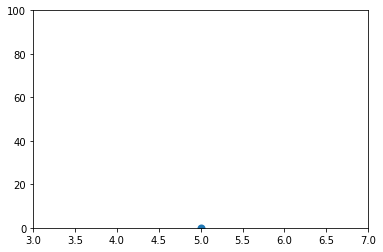

In [3]:
fig = plt.figure()
ax = plt.axes(xlim=(3, 7), ylim=(0, 100))

vt = 0
yt = 100
x = 5


def animate(i):
    global vt, yt, dt, x, ax
    axisUpdate()
    yt, vt = update(dt, yt, vt)
    ax.scatter([x], [yt], lw=2)


anim = animation.FuncAnimation(fig, animate, frames=50, interval=20)
HTML(anim.to_jshtml())

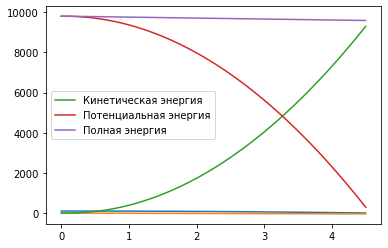

In [4]:
plt.plot(t, y)
plt.plot(t, v)

mass = 10
K = [mass / 2 * (v[i]**2) for i in range(len(t))]

P = [mass * (-1) * a * y[i] for i in range(len(t))]
E = [K[i] + P[i] for i in range(len(t))]

plt.plot(t, K, label="Кинетическая энергия")
plt.plot(t, P, label="Потенциальная энергия")
plt.plot(t, E, label="Полная энергия")

plt.legend()

In [5]:
def acceleration(y):
    return g / (1 + y / R)**2


dt = 0.1
g = -9.8
R = 6300 * 10**3

yt = 10000
vt = 0
at = acceleration(yt)

y = np.array([yt])
v = np.array([vt])
a = np.array([at])
t = np.array([0])


def update(dt, yt, vt, at):
    global v, y, t
    if (yt > 0):
        y = np.append(y, yt)
        v = np.append(v, vt)
        a = np.append(a, at)
        t = np.append(t, t[-1] + dt)

        at = acceleration(yt)
        vt = vt + dt * at
        yt = yt + dt * vt

    else:
        yt = 0

    return yt, vt


def axisUpdate():
    ax.clear()
    ax.set_xlim(3, 7)
    ax.set_ylim(0, 100)

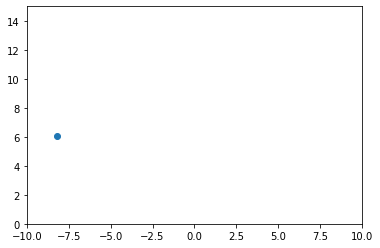

In [6]:
def initalize(ang, v):
    return v * np.cos(ang), v * np.sin(ang)


def acceleration(y):
    return g / (1 + y / R)**2


dt = 0.01
g = -9.8
R = 6300 * 10**3

yt = y0 = 5
xt = x0 = 0

at = acceleration(yt)
vxt, vyt = initalize(np.pi / 4, 9)

x = np.array([xt])
y = np.array([yt])
vx = np.array([vxt])
vy = np.array([vyt])
a = np.array([at])
t = np.array([0])


def appendElems(xt, yt, vxt, vyt, at):
    global x, y, vx, vy, a, t

    x = np.append(x, xt)
    y = np.append(y, yt)
    vx = np.append(vx, vxt)
    vy = np.append(vy, vyt)
    a = np.append(a, at)
    t = np.append(t, t[-1] + dt)


def update():
    global xt, yt, vxt, vyt, at, dt

    if yt + dt * vyt <= 0:
        vyt = -min(vy)
        yt = 0
    else:
        yt = yt + dt * vyt

    if abs(xt + dt * vxt) >= 10:
        vxt = -vxt
        xt = 10 if xt > 0 else -10
    else:
        xt = xt + dt * vxt

    vyt = vyt + dt * at
    at = acceleration(yt)

    appendElems(xt, yt, vxt, vyt, at)
    return xt, yt


def axisUpdate():
    ax.clear()
    ax.set_xlim(-10, 10)
    ax.set_ylim(0, y0 + 10)


def animate(i):
    global ax
    axisUpdate()
    x, y = update()
    ax.scatter([x], [y])


fig = plt.figure()
ax = plt.axes(xlim=(-10, 10), ylim=(0, y0 + 10))

anim = animation.FuncAnimation(fig, animate, frames=500, interval=10)
HTML(anim.to_jshtml())

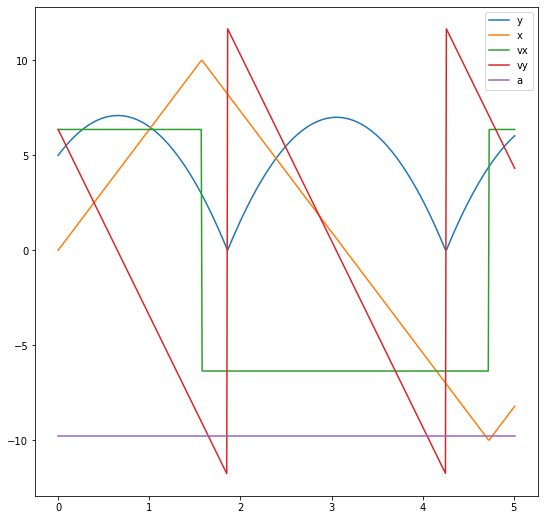

In [7]:
fig = plt.figure(figsize=(9, 9))

plt.plot(t, y, label="y")
plt.plot(t, x, label="x")
plt.plot(t, vx, label="vx")
plt.plot(t, vy, label="vy")
plt.plot(t, a, label="a")

plt.legend()

plt.show()

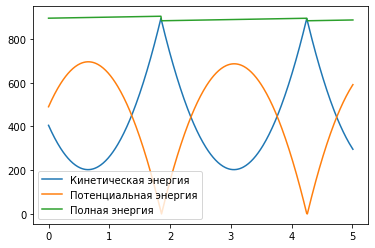

In [8]:
mass = 10
K = [mass / 2 * (vx[i]**2 + vy[i]**2) for i in range(len(t))]

P = [mass * (-1) * a[i] * y[i] for i in range(len(t))]
E = [K[i] + P[i] for i in range(len(t))]

plt.plot(t, K, label="Кинетическая энергия")
plt.plot(t, P, label="Потенциальная энергия")
plt.plot(t, E, label="Полная энергия")

plt.legend()
plt.show()